In [72]:
%tensorflow_version 1.x


TensorFlow is already loaded. Please restart the runtime to change versions.


In [73]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #이 세개 거의 필수적

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time


##디바이스
리스트 보기

In [74]:
from tensorflow.python.client import device_lib
print(tf.test.gpu_device_name())

/device:GPU:0


##NVIDIA GPU 상태보기

In [75]:
!nvidia-smi #리눅스 명령어: GPU의 상태를 출력함

Mon Aug 10 10:01:33 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    59W / 149W |    159MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##데이터 준비

200
(200,)


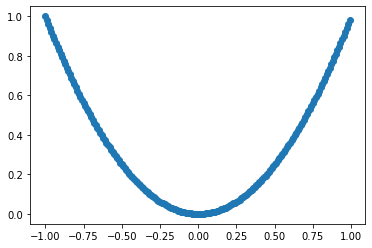

In [76]:
import numpy as np
x=np.arange(-1, 1, 0.01)
y=x**2
plt.scatter(x, y)

print(len(x))
print(x.shape)


##Keras DNN 최소코드에 기본 추가

In [77]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

model=keras.Sequential()
#model.add(Input(1))
model.add(Dense(10, activation='tanh', input_shape=(1, )))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

#model.compile(optimizer='SGD', loss='mse')
model.compile(optimizer='SGD', loss='mse', metrics=['mse'])

#학습
model.fit(x, y, epochs=1000, verbose=0, batch_size=20)

#결과 출력
loss,mse=model.evaluate(x, y) #성능 평가하기: 숫자로 평가하고 평가된 값이 출력에 추가됨
print("loss=", loss)
print("mse=", mse)



7/7 [==============================] - 0s 3ms/step - loss: 0.0010 - mse: 0.0010
loss= 0.0010231402702629566
mse= 0.0010231402702629566


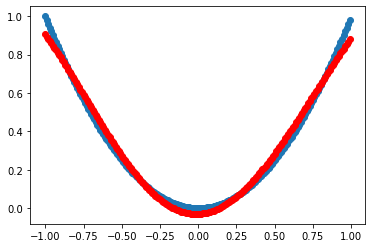

In [78]:
#예측
y_=model.predict(x)

plt.scatter(x, y)
plt.scatter(x, y_, color='r')
plt.show()


##테스트셋으로 평가하기
   데이터를 train set과 test set으로 나누어 준비한다.

<function matplotlib.pyplot.show>

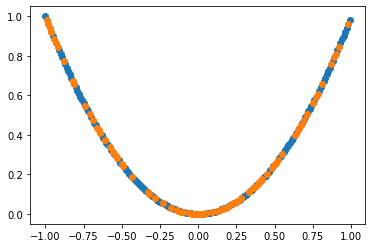

In [79]:
x=np.arange(-1, 1, 0.01)
np.random.shuffle(x)
y=x**2

split_index=int(x.shape[0]*0.6)

train_x, test_x=x[:split_index], x[split_index:]
train_y, test_y=y[:split_index], y[split_index:]

#결과를 그래프로 보기
plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)
plt.show

In [89]:
model=keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer='SGD', loss="mse", metrics=["mse"])

start_time=time.time() #added

#model.fit(x, y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)

print("elapsed:{ }", format(time.time()-start_time()) #added

#train set으로 학습

#loss, mse = model.evaluate(x, y)
loss, mse=model.evaluate(test_x, test_y) #성능평가는 test_set으로
print("loss=", loss)
print("mse=", mse)

#y_=model.predict(x)
y_=model.predict(test_x)

#plt.scatter(x.y)
plt.scatter(test_x, test_y)
#plt.scatter(x, y_, color='r')
plt.scatter(test_x, y_, color='r')
plt.show

SyntaxError: ignored

  이후 비교를 위해 그래프를 저장해 둠

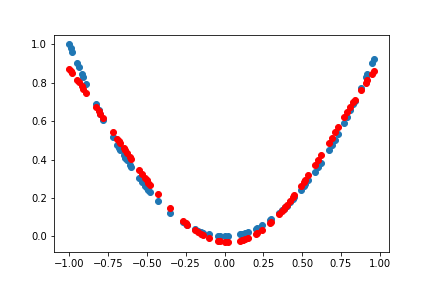

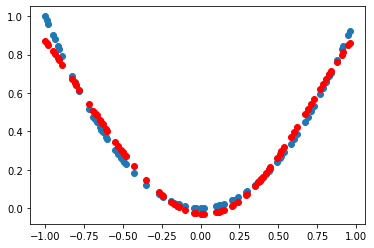

In [58]:
plt.scatter(test_x, test_y)
plt.scatter(test_x, y_, color='r')
plt.savefig("base_result.png")

from IPython.display import Image
display(Image("base_result.png"))
